In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
#np.asarray(prices)
# Success
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.



## Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

'RM' is the average number of rooms among homes in the neighborhood.

'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).

'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an increase in the value of 'MEDV' or a decrease in the value of 'MEDV'? Justify your answer for each.

Would you expect a home that has an 'RM' value(number of rooms) of 6 be worth more or less than a home that has an 'RM' value of 7?

In [2]:
# Minimum price of the data
minimum_price = np.min(prices)

#  Maximum price of the data
maximum_price = np.max(prices)

#  Mean price of the data
mean_price =  np.mean(prices)

#  Median price of the data
median_price = np.median (prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


In [3]:
#slicing prices acrroding to number of rooms
# get the mean price of house if number of room < 6
print(round(np.mean(prices [features['RM'] < 6])))
# get the mean price of house if number of room > 6
print(round(np.mean(prices [features['RM'] > 6])))
# for values of RM increasing the prices increse also.

358830
505704


In [4]:
# Round RM values to make more sense 
# just for check
RoundedRM=round(features['RM'])
print(round(np.mean(prices [RoundedRM == 4])))
print(round(np.mean(prices [RoundedRM == 5])))
print(round(np.mean(prices [RoundedRM == 6])))
print(round(np.mean(prices [RoundedRM == 7])))
print(round(np.mean(prices [RoundedRM == 8])))

357420
293417
402536
577655
910219


Would you expect a neighborhood that has an 'LSTAT' value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an 'LSTAT' value of 20?

In [5]:
#slicing prices acrroding to Neighborhood  poverty level
print(round(np.mean(prices [features['LSTAT'] < 15])))
print(round(np.mean(prices [features['LSTAT'] > 15])))
print(round(np.mean(prices [features['LSTAT'] > 20])))
# for LSTAT values increasing the prices decrease

527325
307028
259918


Would you expect a neighborhood that has an 'PTRATIO' value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an 'PTRATIO' value of 15?

In [6]:
# slicing prices acrroding toStudent-teacher ratio of nearby schools
print(round(np.mean(prices [features['PTRATIO'] < 15])))
print(round(np.mean(prices [features['PTRATIO'] > 15])))
# for PTRATIO values increasing the prices decrease

564471
442079


## Question 1 ansewer 

 **Feature Observation**
 
 from  numrical data exploratory above we notice:
 
 
* an increase in the value of RM feature would lead to an increase in the value of 'MEDV' for sure when the size of house increase (number of its rooms) the prize will increase as well.

* an increase in the value of LSTAT  feature would lead to an decrease in the value of 'MEDV'.a large percent of low income families correlate with lower prices cause the lowest income of family means(they  can not afford buying a high prize houses) there will be a few services and Facilities nearby so this will lead to the  house prizes decrease.

* an increase in the value of PTRATIO  feature would lead to an decrease in the value of 'MEDV'. large number of of students per teacher considered a negative characteristic cause when number of student per student increase it means the quality of education will be so bad and schools will be poor too, so the prizes of houses incearse as well.

In [7]:
# Import 'r2_score' coefficient of determination R^2
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
# Calculate the performance score between 'y_true' and 'y_predict'
    score =  r2_score(y_true, y_predict)
# Return the score
    return score

In [8]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


## Question 2 answer 
 this model to have successfully captured the variation of the target variable
 
*** cause coefficient of determination (R^2) = .923 it means that 92.3% percent of the variance in Y_predict is predictable from 
the independent variables it close to 100% so it's a good prediction ratio 


## Implementation: Shuffle and Split Data

In [9]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
#Split the data into 80% training and 20% testing.
#Assign the train and testing splits to X_train, X_test, y_train, and y_test.
# random_state=0 to ensure that  results are consistent
X_train, X_test, y_train, y_test = train_test_split(features, prices,test_size=.20, random_state=0)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


## Question 3 answer 
 the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm :
* give estimates of performace on independent dataset.
* serve a check for an overfitting. 
* We split the data to evaluate our model.
* to know how well my model doing and compare between algorthims.
* to choose the best algorthim which achive the best accuracy based on testing and training sets.


## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing 'max_depth' parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R2, the coefficient of determination.

Run the code cell below and use these graphs to answer the following question.

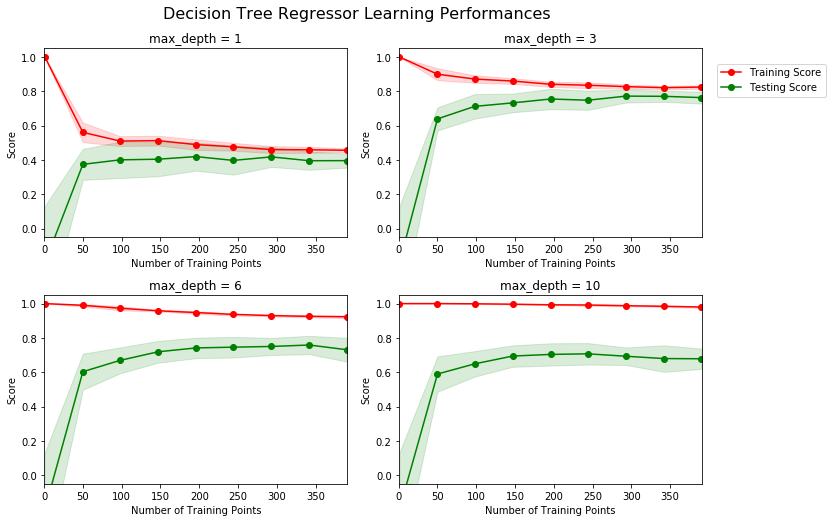

In [21]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)


## Question 4 - Learning the Data
Choose one of the graphs above and state the maximum depth for the model.
What happens to the score of the training curve as more training points are added? What about the testing curve?
Would having more training points benefit the model?


## Answer:
* in 1st graph (with max depth =1 ) we notice the testing and training scores are  very small --> this is **underfitting** the algothim is very simple so slove the problem the training  score curve in the begaining increase by increase the number of training points but it still very small. and the testing score curve in the begaining is so perfect but it increase quickly by increase the number of training points and become very small like the training score. by increasing training points again the training and testing scores hardly change or improve. the difference between two curves is sign for **high bais**. which means this model is too bad.

 + I think more training points would not benefit the model cause the curve of testing score tend to decrease (or not improve )when the training point increase  

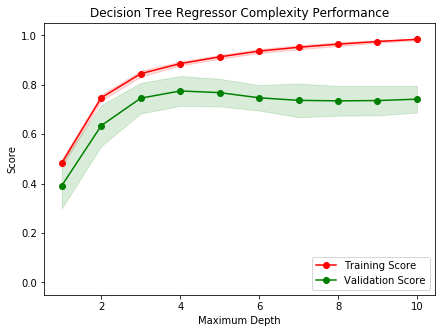

In [11]:
vs.ModelComplexity(X_train, y_train)

## Question 5 - Bias-Variance Tradeoff 


When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?

How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?



# Answer :

* when the model is trained with a maximum depth of 1, the model will suffer from high bias 

 + it means: the model misses the relevant relations between features and target outputs (underfitting)
 the validation and training scores are low 
  +  the model is not complex enough to capture the underlying relationship


* when the model is trained with maximum depth of 10 it causes random noise in the training data, rather than the intended outputs (overfitting) or high variance. 
 + the training score is very high and the validation score decreases
 + the model here is too complex 
 


# Question 6 - Best-Guess Optimal Model
Which maximum depth do you think results in a model that best generalizes to unseen data?

What intuition lead you to this answer?


## Answer :

-  Model with 4 maximum depth is the best generalizes to unseen data

**from the plot above:**

 *** the model with 4 maximum depth have the most validation score (.8) 
 
- this maximum depth hasn't high bais or high various which is good for testing set and validation score.

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from fit_model.

# Question 7 - Grid Search

What is the grid search technique?

How it can be applied to optimize a learning algorithm?


*** machine learning models have lots of hyperparameters to adjust. Often the best way to find the best settings is just through trial and error, but it can take a lot of work to try all the possible combinations. 
 
 A solution for this problem is to use a grid search.
 
* A grid search is where you list out a range of settings you want to try for each parameter, and you literally try them all. You train and test the model for every combination of parameters. The combination of parameters that generates the best predictions are the set of parameters you should use for your real model. 
* In this project, the estimator is DecisionTreeRegressor and specific parameter is max_depth. Grid search will put all the hyper parameters('max_depth':range(1,11)) onto a grid, and search for which parameters get a better performance on our score function. Finally, it would return a combination of parameters that delivers the best performance


## Question 8 - Cross-Validation
What is the k-fold cross-validation training technique?

What benefit does this technique provide for grid search when optimizing a model?


# Answer:
In K-fold cross validation, we split the training data into k parts, or folds.

We build the model based on the data from k - 1 folds(training set), and test the model on the remaining fold (the test set).

We can build variations of the model using different sets of parameters. Then, we repeat this procedure k  times, excluding a different fold from model building each time.

for k-fold cv you run k seprate learning experiments

After we finish, to choose the value for each parameter, we can take the average of the values from those k experiments.

Though the grid search can return the features that deliver the best performance, but according to the reasons above, cross-validation makes grid search work better on unseen data.

The benefit using cross validation technique for grid search when optimizing a model is allow to optimize parameter tuning across all data. If not using cross validation, in example only using kfold, it will not shuffle the data and grid search would only perform tuning on the same data.

## Implementation: Fitting a Model

1- Use DecisionTreeRegressor from sklearn.tree to create a decision tree regressor object.

2- Assign this object to the 'regressor' variable.

3- Create a dictionary for 'max_depth' with the values from 1 to 10, and assign this to the 'params' variable.

4- Use make_scorer from sklearn.metrics to create a scoring function object.

5- Pass the performance_metric function as a parameter to the object.

6- Assign this scoring function to the 'scoring_fnc' variable.

7- Use GridSearchCV from sklearn.grid_search to create a grid search object.

8- Pass the variables 'regressor', 'params', 'scoring_fnc', and 'cv_sets' as parameters to the object.

9- Assign the GridSearchCV object to the 'grid' variable.

In [12]:
#  Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer 
#self note:  sikit learn version 0.19 GridSearchCV import different than 0.17 and 0.18
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor =DecisionTreeRegressor()
    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':  (1, 2, 3, 4, 5 ,6 ,9 ,8 ,9, 10)}

    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV (estimator=regressor, param_grid=params, scoring =scoring_fnc, cv=cv_sets)
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

## Question 9 - Optimal Model
+ What maximum depth does the optimal model have? How does this result compare to your guess in Question 6?



In [13]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


# Question 9 answer :
the optimal model have maximum depth 4 . 
it's like what I'm guessed in question 6 

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

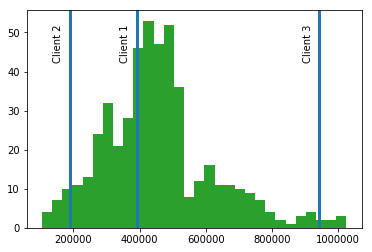

In [17]:
import matplotlib.pyplot as plt
for i,price in enumerate(reg.predict(client_data)):
    plt.hist(prices, bins = 30)
    plt.axvline(price, lw = 3)
    plt.text(price-50000, 50, 'Client '+str(i+1), rotation=90)

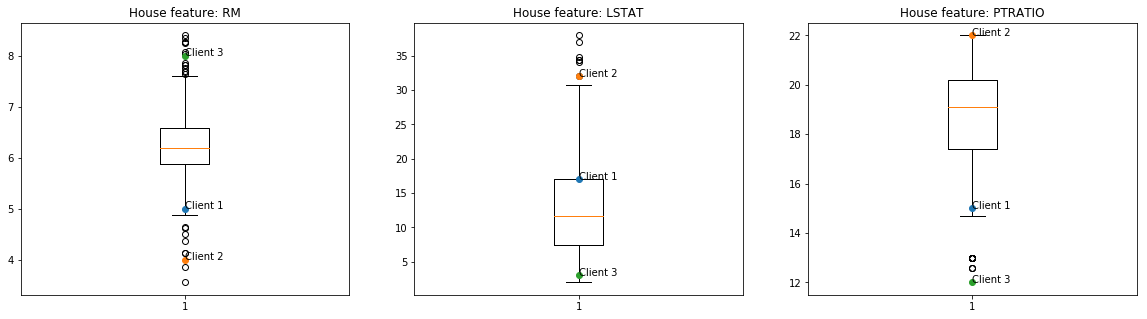

In [27]:
plt.figure(figsize=(20, 5))
for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.boxplot(data[col])
    plt.title('House feature: {}'.format(col))
    for j in range(3):
        plt.plot(1, client_data[j][i], marker="o")
        plt.annotate('Client '+str(j+1), xy=(1,client_data[j][i]))

In [19]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


# Question 10 answer :

**using statistics in  visual data exploration section:**

* the biggest home you have the best price for house 

 + for values Student-teacher ratio of nearby schools >15  the prices is low 
 + and Student-teacher ratio of nearby schools < 15 the prices is high
 + the least Neighborhood poverty level the higher prices 
 
 
* so client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; (the best price)

* clinent 1 is in the midddle between client 2, 3 in number of room, poverty level, and Student-teacher ratio of nearby schools so it's prize is in the middle between client 2, 3


* while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.
 (the least price)
 

## Sensitivity
An optimal model is not necessarily a robust model.

* robust system : system achives it's goal without looking at any disturbance.

Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted.

In [20]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


## Question 11 - Applicability

In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.


1- How relevant today is data that was collected from 1978? How important is inflation?

2- Are the features present in the data sufficient to describe a home?

3- Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?

4- Is the model robust enough to make consistent predictions?

5- Would data collected in an urban city like Boston be applicable in a rural city?

6- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

*   **data from 1978** is very different than now, cause people taste changes over time like people now like places have a good 4G connection in the past this factor was not important or not found at all.

*  every factor can make difference. but we should consider that correlation doesn't prove causation so we can't say that the houses with pool have a high price. there are another factors to be considered however the more data we have -training data- the more we can predict prices correctly as possible. so factors like **square feet of the plot area**, **presence of pool** and **quality of apppliances in the home** will be a good factors to be considered but not enough to predict house price. for sure data from an **urban city** not applicable in a **rural city**. cause like I said there are other factors to be considered like if there a beach in this city or not and people have differnet tastes , like we know the houses in big cities like NewYork are more expensive cause it near to the services like big restaurants, cinemas and big companies. 

* No, we can't make consistent prdictions from this model it's only appiled to boston houses.

*  we should judge the price of the an individual home based on both the characteristics of the house itself and the entire neighborhood, not only the neighborhood. **the neighborhood poverty level** matters with some people other not.
